In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../")
from ml_tools import *


import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import random

from xgboost import plot_importance
from xgboost import XGBRegressor
import statsmodels.api as sm

from sklearn.model_selection import train_test_split

# 2018

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/erichschulman/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**********************************************************
**************** lasso results ***************************
**********************************************************


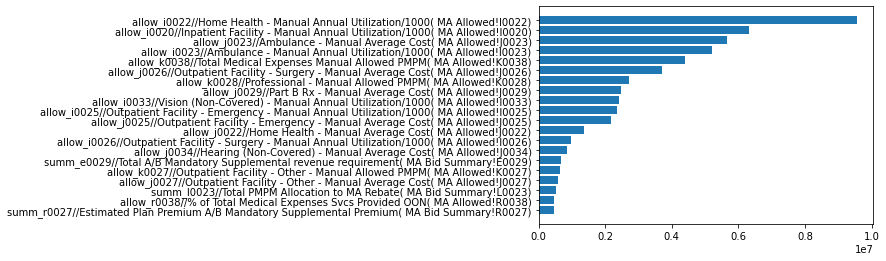

summ_r0027//Estimated Plan Premium A/B Mandatory Supplemental Premium( MA Bid Summary!R0027)        4.557748e+05
allow_r0038//% of Total Medical Expenses Svcs Provided OON( MA Allowed!R0038)                       4.714890e+05
summ_l0023//Total PMPM Allocation to MA Rebate( MA Bid Summary!L0023)                               5.156636e+05
allow_j0027//Outpatient Facility - Other - Manual Average Cost( MA Allowed!J0027)                   5.949591e+05
allow_k0027//Outpatient Facility - Other - Manual Allowed PMPM( MA Allowed!K0027)                   6.300438e+05
summ_e0029//Total A/B Mandatory Supplemental revenue requirement( MA Bid Summary!E0029)             6.635347e+05
allow_j0034//Hearing (Non-Covered) - Manual Average Cost( MA Allowed!J0034)                         8.502840e+05
allow_i0026//Outpatient Facility - Surgery - Manual Annual Utilization/1000( MA Allowed!I0026)      9.737136e+05
allow_j0022//Home Health - Manual Average Cost( MA Allowed!J0022)                               

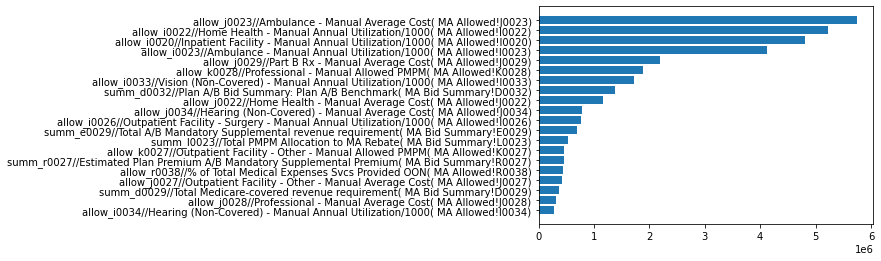

allow_i0034//Hearing (Non-Covered) - Manual Annual Utilization/1000( MA Allowed!I0034)            2.862087e+05
allow_j0028//Professional - Manual Average Cost( MA Allowed!J0028)                                3.223648e+05
summ_d0029//Total Medicare-covered revenue requirement( MA Bid Summary!D0029)                     3.740199e+05
allow_j0027//Outpatient Facility - Other - Manual Average Cost( MA Allowed!J0027)                 4.302452e+05
allow_r0038//% of Total Medical Expenses Svcs Provided OON( MA Allowed!R0038)                     4.426613e+05
summ_r0027//Estimated Plan Premium A/B Mandatory Supplemental Premium( MA Bid Summary!R0027)      4.559125e+05
allow_k0027//Outpatient Facility - Other - Manual Allowed PMPM( MA Allowed!K0027)                 4.614732e+05
summ_l0023//Total PMPM Allocation to MA Rebate( MA Bid Summary!L0023)                             5.277916e+05
summ_e0029//Total A/B Mandatory Supplemental revenue requirement( MA Bid Summary!E0029)           6.868105e+05
a

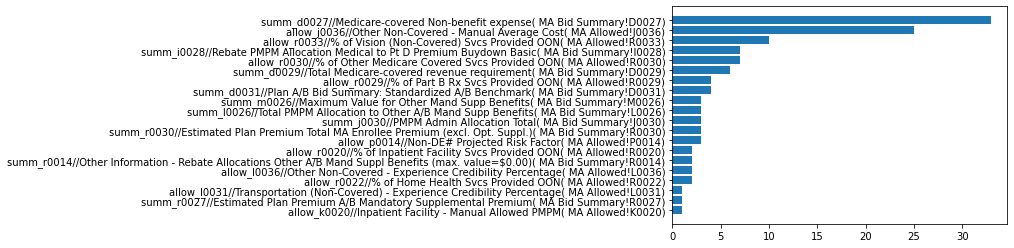

19    summ_d0027//Medicare-covered Non-benefit expen...
2     allow_j0036//Other Non-Covered - Manual Averag...
17    allow_r0033//% of Vision (Non-Covered) Svcs Pr...
25    summ_i0028//Rebate PMPM Allocation Medical to ...
15    allow_r0030//% of Other Medicare Covered Svcs ...
20    summ_d0029//Total Medicare-covered revenue req...
14    allow_r0029//% of Part B Rx Svcs Provided OON(...
21    summ_d0031//Plan A/B Bid Summary: Standardized...
30    summ_m0026//Maximum Value for Other Mand Supp ...
29    summ_l0026//Total PMPM Allocation to Other A/B...
26    summ_j0030//PMPM Admin Allocation Total( MA Bi...
33    summ_r0030//Estimated Plan Premium Total MA En...
11    allow_p0014//Non-DE# Projected Risk Factor( MA...
12    allow_r0020//% of Inpatient Facility Svcs Prov...
31    summ_r0014//Other Information - Rebate Allocat...
8     allow_l0036//Other Non-Covered - Experience Cr...
13    allow_r0022//% of Home Health Svcs Provided OO...
6     allow_l0031//Transportation (Non-Covered) 

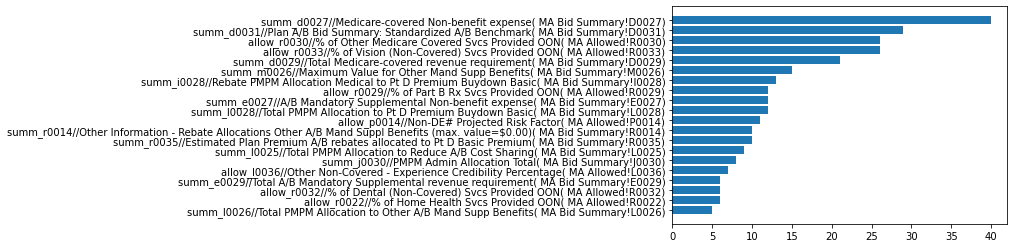

38    summ_d0027//Medicare-covered Non-benefit expen...
40    summ_d0031//Plan A/B Bid Summary: Standardized...
32    allow_r0030//% of Other Medicare Covered Svcs ...
34    allow_r0033//% of Vision (Non-Covered) Svcs Pr...
39    summ_d0029//Total Medicare-covered revenue req...
58    summ_m0026//Maximum Value for Other Mand Supp ...
45    summ_i0028//Rebate PMPM Allocation Medical to ...
31    allow_r0029//% of Part B Rx Svcs Provided OON(...
43    summ_e0027//A/B Mandatory Supplemental Non-ben...
54    summ_l0028//Total PMPM Allocation to Pt D Prem...
21    allow_p0014//Non-DE# Projected Risk Factor( MA...
59    summ_r0014//Other Information - Rebate Allocat...
66    summ_r0035//Estimated Plan Premium A/B rebates...
52    summ_l0025//Total PMPM Allocation to Reduce A/...
49    summ_j0030//PMPM Admin Allocation Total( MA Bi...
18    allow_l0036//Other Non-Covered - Experience Cr...
44    summ_e0029//Total A/B Mandatory Supplemental r...
33    allow_r0032//% of Dental (Non-Covered) Svc

In [2]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../")
from ml_tools import *


data_year = 2018
num_trials = 5
df = read_bid_data(data_year)
y,X = clean_bid_data(df)
training_test = train_test_pfold(X,y, num_trials = 5)

print('**********************************************************')
print('**************** lasso results ***************************')
print('**********************************************************')

# Vary alpha values
a = [250,500]

for i in a: 
    run_lasso(i,training_test)

print('**********************************************************')
print('**************** tree results ****************************')
print('**********************************************************')

params = [(1,.2, 0.9, .9),(2,.1, 0.9, .5)]

for a in params:
    run_tree(a,training_test)

# 2012

**********************************************************
**************** lasso results ***************************
**********************************************************


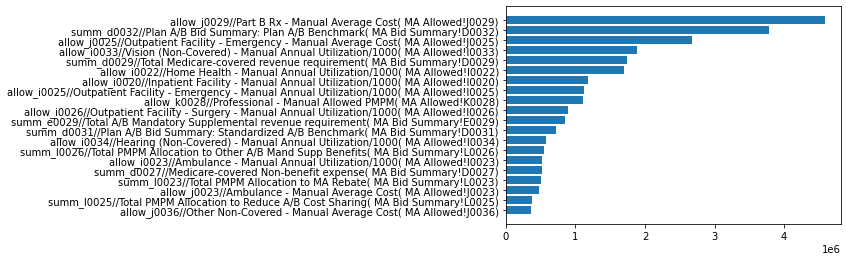

allow_j0036//Other Non-Covered - Manual Average Cost( MA Allowed!J0036)                             3.656851e+05
summ_l0025//Total PMPM Allocation to Reduce A/B Cost Sharing( MA Bid Summary!L0025)                 3.720006e+05
allow_j0023//Ambulance - Manual Average Cost( MA Allowed!J0023)                                     4.757497e+05
summ_l0023//Total PMPM Allocation to MA Rebate( MA Bid Summary!L0023)                               5.068828e+05
summ_d0027//Medicare-covered Non-benefit expense( MA Bid Summary!D0027)                             5.232051e+05
allow_i0023//Ambulance - Manual Annual Utilization/1000( MA Allowed!I0023)                          5.239678e+05
summ_l0026//Total PMPM Allocation to Other A/B Mand Supp Benefits( MA Bid Summary!L0026)            5.444080e+05
allow_i0034//Hearing (Non-Covered) - Manual Annual Utilization/1000( MA Allowed!I0034)              5.715030e+05
summ_d0031//Plan A/B Bid Summary: Standardized A/B Benchmark( MA Bid Summary!D0031)             

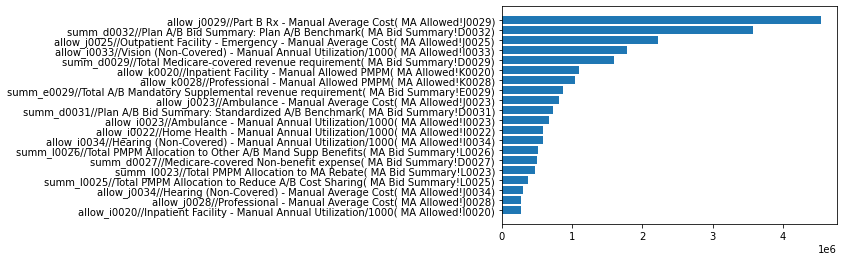

allow_i0020//Inpatient Facility - Manual Annual Utilization/1000( MA Allowed!I0020)         2.731094e+05
allow_j0028//Professional - Manual Average Cost( MA Allowed!J0028)                          2.749780e+05
allow_j0034//Hearing (Non-Covered) - Manual Average Cost( MA Allowed!J0034)                 3.004377e+05
summ_l0025//Total PMPM Allocation to Reduce A/B Cost Sharing( MA Bid Summary!L0025)         3.755479e+05
summ_l0023//Total PMPM Allocation to MA Rebate( MA Bid Summary!L0023)                       4.688532e+05
summ_d0027//Medicare-covered Non-benefit expense( MA Bid Summary!D0027)                     4.986349e+05
summ_l0026//Total PMPM Allocation to Other A/B Mand Supp Benefits( MA Bid Summary!L0026)    5.158268e+05
allow_i0034//Hearing (Non-Covered) - Manual Annual Utilization/1000( MA Allowed!I0034)      5.841536e+05
allow_i0022//Home Health - Manual Annual Utilization/1000( MA Allowed!I0022)                5.853934e+05
allow_i0023//Ambulance - Manual Annual Utilization/1000

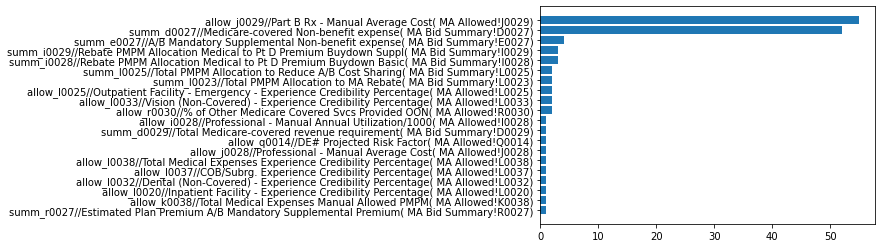

2     allow_j0029//Part B Rx - Manual Average Cost( ...
12    summ_d0027//Medicare-covered Non-benefit expen...
14    summ_e0027//A/B Mandatory Supplemental Non-ben...
16    summ_i0029//Rebate PMPM Allocation Medical to ...
15    summ_i0028//Rebate PMPM Allocation Medical to ...
18    summ_l0025//Total PMPM Allocation to Reduce A/...
17    summ_l0023//Total PMPM Allocation to MA Rebate...
5     allow_l0025//Outpatient Facility - Emergency -...
7     allow_l0033//Vision (Non-Covered) - Experience...
11    allow_r0030//% of Other Medicare Covered Svcs ...
0     allow_i0028//Professional - Manual Annual Util...
13    summ_d0029//Total Medicare-covered revenue req...
10    allow_q0014//DE# Projected Risk Factor( MA All...
1     allow_j0028//Professional - Manual Average Cos...
9     allow_l0038//Total Medical Expenses Experience...
8     allow_l0037//COB/Subrg. Experience Credibility...
6     allow_l0032//Dental (Non-Covered) - Experience...
4     allow_l0020//Inpatient Facility - Experien

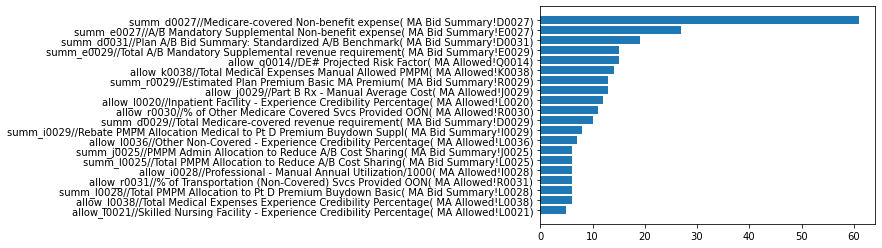

47    summ_d0027//Medicare-covered Non-benefit expen...
53    summ_e0027//A/B Mandatory Supplemental Non-ben...
49    summ_d0031//Plan A/B Bid Summary: Standardized...
54    summ_e0029//Total A/B Mandatory Supplemental r...
39    allow_q0014//DE# Projected Risk Factor( MA All...
21    allow_k0038//Total Medical Expenses Manual All...
73    summ_r0029//Estimated Plan Premium Basic MA Pr...
16    allow_j0029//Part B Rx - Manual Average Cost( ...
22    allow_l0020//Inpatient Facility - Experience C...
42    allow_r0030//% of Other Medicare Covered Svcs ...
48    summ_d0029//Total Medicare-covered revenue req...
56    summ_i0029//Rebate PMPM Allocation Medical to ...
33    allow_l0036//Other Non-Covered - Experience Cr...
57    summ_j0025//PMPM Admin Allocation to Reduce A/...
61    summ_l0025//Total PMPM Allocation to Reduce A/...
6     allow_i0028//Professional - Manual Annual Util...
43    allow_r0031//% of Transportation (Non-Covered)...
63    summ_l0028//Total PMPM Allocation to Pt D 

In [3]:
data_year = 2012
num_trials = 5
df = read_bid_data(data_year)
y,X = clean_bid_data(df)
training_test = train_test_pfold(X,y, num_trials = 5)

print('**********************************************************')
print('**************** lasso results ***************************')
print('**********************************************************')

# Vary alpha values
a = [250,500]

for i in a: 
    run_lasso(i,training_test)

print('**********************************************************')
print('**************** tree results ****************************')
print('**********************************************************')

params = [(1,.2, 0.9, .9),(2,.1, 0.9, .5)]

for a in params:
    run_tree(a,training_test)